In [1]:
# from agent.graph import graph
from agent.context import Context
from langgraph.store.memory import InMemoryStore
from langgraph.checkpoint.memory import MemorySaver
from agent.graph import builder

# Create the context and store
context = Context(
    user_id="test_user1",
    model="anthropic/claude-3-5-sonnet-20240620",
)

store = InMemoryStore()

# Build the graph with store and checkpointer
graph = builder.compile(store=store, checkpointer=MemorySaver())



In [5]:
res =  await graph.ainvoke(
        {"messages": [("user", "I am doing 10000 steps a day and 50 squats a day")]},
        {"thread_id": "thread1"},
        context=context,
    )

In [6]:
for message in res['messages']:
    message.pretty_print()

================================ Human Message =================================

how are you?
================================== Ai Message ==================================

Hello! It's great to hear from you. I'm doing well, thank you for asking. More importantly, how are you doing today? I hope you're having a good day so far. 

I notice we don't have any stored information about your preferences or health goals yet. Would you like to share a bit about what brings you to chat with me today? Perhaps you have some health or fitness goals you'd like to work on, or maybe you're just curious about how I can help. I'm here to assist you with any health and wellness questions or to provide personalized insights based on your Fitbit data.
================================ Human Message =================================

I am doing 10000 steps a day and 50 squats a day
================================== Ai Message ==================================

[{'text': "That's fantastic! I'm really i

In [7]:
namespace = ("memories", context.user_id)
memories = store.search(namespace)

In [8]:
memories

[Item(namespace=['memories', 'test_user1'], key='7a91c608-f361-4c82-9481-c58e48336ab9', value={'content': 'User is currently doing 10,000 steps and 50 squats daily.', 'context': 'This information was shared when discussing current fitness habits.'}, created_at='2025-08-25T11:42:06.680402+00:00', updated_at='2025-08-25T11:42:06.680411+00:00', score=None)]

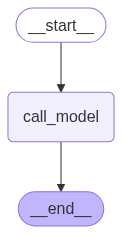

In [2]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass